# Everyone Can Learn Python Scholarship

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [2]:
# any missing values?
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [3]:
#distinct values in object type
for i in cars.select_dtypes(include='object').columns:
    print("Column: ", i)
    print('Distinct values:', cars[i].unique())
    print(" ")

Column:  Make
Distinct values: ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
 
Column:  Model
Distinct values: ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
 
Column:  Vehicle Class
Distinct values: ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
 
Column:  Transmission
Distinct values: ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 

In [4]:
#1.What is the median engine size in liters?
median_engine_size = cars['Engine Size(L)'].median()
print("Median engine size in liters is",median_engine_size,"L")

Median engine size in liters is 3.0 L


In [5]:
#2 What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?
D,E,N,X,Z = np.round(cars.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean(),2)
print("Average fuel consumption for regular gasoline for")
print("Regular gasoline (Fuel Type = X):",X,"L/100 km")
print("Premium gasoline (Z):",Z,"L/100 km")
print("Ethanol (E):", E,"L/100 km")
print("Diesel (D):", D,"L/100 km")

Average fuel consumption for regular gasoline for
Regular gasoline (Fuel Type = X): 10.08 L/100 km
Premium gasoline (Z): 11.42 L/100 km
Ethanol (E): 16.86 L/100 km
Diesel (D): 8.84 L/100 km


In [58]:
#3 What is the correlation between fuel consumption and CO2 emissions?
#create empty df_fuel_ce
df_fuel_ce = pd.DataFrame()
# do some data transformation on these two factors so that they have same unit as L/KM
df_fuel_ce['Fuel Consumption Comb (L/km)'] = cars['Fuel Consumption Comb (L/100 km)'] * 100
df_fuel_ce['CO2 Emissions(L/km)'] = cars['CO2 Emissions(g/km)']/10**-3

# get the correlation between df_fuel_ce
corr_value = df_fuel_ce.corr()
print("The correlation between fuel consumption and CO2 emissions: ", 
      np.round(corr_value.loc[('CO2 Emissions(L/km)','Fuel Consumption Comb (L/km)')],2))


The correlation between fuel consumption and CO2 emissions:  0.92


In [8]:
#4 Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
avg_emi_vehicle_class = cars.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
suv_small = avg_emi_vehicle_class.loc['SUV - SMALL']
mid_size = avg_emi_vehicle_class.loc['MID-SIZE']
print("Average CO2 emissions for \'SUV - SMALL\' is ", np.round(suv_small,2), 'g/km')
print("Average CO2 emissions for \'MID-SIZE\' is ", np.round(mid_size,2),'g/km')
print("\'MID-SIZE\' has lower average CO2 emissions than \'SUV - SMALL\' ")

Average CO2 emissions for 'SUV - SMALL' is  236.29 g/km
Average CO2 emissions for 'MID-SIZE' is  222.46 g/km
'MID-SIZE' has lower average CO2 emissions than 'SUV - SMALL' 


In [9]:
#4 What are the average CO2 emissions for all vehicles?
print("Average CO2 emissions for all vehicles:", avg_emi_vehicle_class, sep="\n")

Average CO2 emissions for all vehicles:
Vehicle Class
COMPACT                     216.679061
FULL-SIZE                   263.316119
MID-SIZE                    222.455428
MINICOMPACT                 236.607362
MINIVAN                     262.312500
PICKUP TRUCK - SMALL        278.968553
PICKUP TRUCK - STANDARD     301.513011
SPECIAL PURPOSE VEHICLE     237.597403
STATION WAGON - MID-SIZE    238.698113
STATION WAGON - SMALL       200.067460
SUBCOMPACT                  246.448845
SUV - SMALL                 236.292523
SUV - STANDARD              304.836735
TWO-SEATER                  277.454348
VAN - CARGO                 361.500000
VAN - PASSENGER             397.212121
Name: CO2 Emissions(g/km), dtype: float64


In [10]:
#What are the average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?
avg_emi_eng_smaller = cars[cars['Engine Size(L)'] <= 2.0].groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
print("Average CO2 emissions for all vehicles with an engine size of 2.0 liters or smaller:",
      avg_emi_eng_smaller, sep='\n')

Average CO2 emissions for all vehicles with an engine size of 2.0 liters or smaller:
Vehicle Class
COMPACT                     190.464567
FULL-SIZE                   186.562500
MID-SIZE                    188.815126
MINICOMPACT                 193.912281
SPECIAL PURPOSE VEHICLE     226.743590
STATION WAGON - MID-SIZE    199.666667
STATION WAGON - SMALL       193.031111
SUBCOMPACT                  199.631579
SUV - SMALL                 220.736052
SUV - STANDARD              240.700000
TWO-SEATER                  195.342105
Name: CO2 Emissions(g/km), dtype: float64


### We know that more fuel consumption and more Co2 has strong correlation with 0.92, which is close to 1. These two factors have a strong relationship, so what is this relationship? Let's discover it through visualization.

Text(0.5, 1.0, 'CO2 Emissions(L/km) VS Fuel Consumption Comb (L/km)')

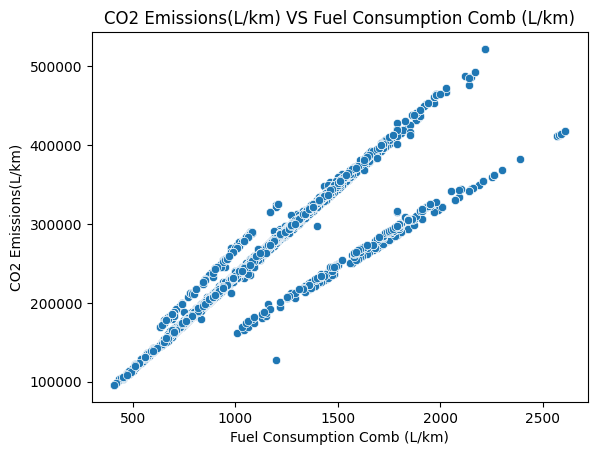

In [57]:
#plot the graph
sns.scatterplot(
          x='Fuel Consumption Comb (L/km)',
          y='CO2 Emissions(L/km)',
          data=df_fuel_ce
            )
plt.title("CO2 Emissions(L/km) VS Fuel Consumption Comb (L/km)")

The scatter plot suggest that fuel consumption and Co2 emission has strong positive linear relationship.The more fuel consumed, the more Co2 emission it made. This makes sense, the Co2 emission generated by the consumption of fuel. The consumption of fuel depends on the number of consumers using vehicles and the size of vehicle. 
Some vehicles consume more while other consume less. Let's explore consumers preference on vehicles first and find factors that causes vehicles consume more fuel.

In [11]:
#check engine size range
print("Engine size from ",
      cars['Engine Size(L)'].min(),
      "to" ,cars['Engine Size(L)'].max())

Engine size from  0.9 to 8.4


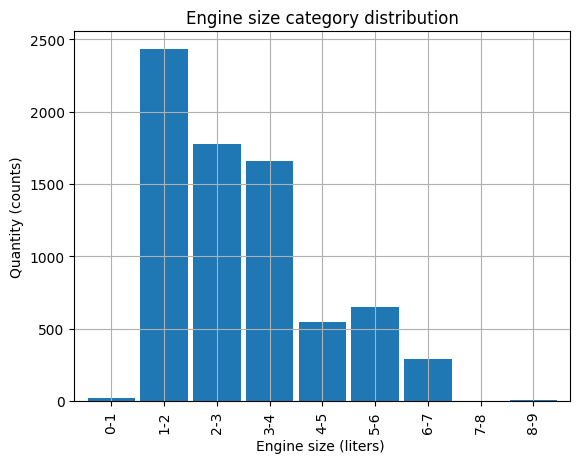

In [54]:
# classify data into different categories based on engine sizes
# 0-1, 1-2, 2-3, 3-4, 4-5, 5-6, 6-7, 7-8, 8-9
bins = np.arange(0,10)
labels = ['0-1','1-2', '2-3','3-4','4-5', '5-6', '6-7', '7-8','8-9']
cars['engine_group'] = pd.cut(cars['Engine Size(L)'], bins=bins, labels=labels)

#plot hist
cars['engine_group'].value_counts().sort_index().plot(kind='bar', width=0.9)
plt.title("Engine size category distribution")
plt.xlabel("Engine size (liters) ")
plt.ylabel("Quantity (counts)")
plt.grid()
plt.show()

From the distribution of engine size category, the engine size categories can be classified into three groups based on its quantiy as small, medium and large.
-  Small, group 0-1,7-8,8-9
-  Medium, group 4-5, 5-6, 6-7
-  Large, group 1-2,2-3,3-4

Let's see what is the contribution of each group in Co2 emission.

In [74]:
#create 3 mask for each group
mask_s = (cars['engine_group'] == '0-1') | (cars['engine_group'] == '7-8') | (cars['engine_group'] == '8-9')
mask_m = (cars['engine_group'] == '4-5') | (cars['engine_group'] == '5-6') | (cars['engine_group'] == '6-7')
mask_l = (cars['engine_group'] == '1-2') | (cars['engine_group'] == '2-3') | (cars['engine_group'] == '3-4')

#label data into small, medium, large
cars.loc[mask_s, 'popularity'] = "small"
cars.loc[mask_m, 'popularity'] = "medium"
cars.loc[mask_l, 'popularity'] = "large"

#check the consumer preference in the data
cars.popularity.value_counts(normalize=True)

large     0.794719
medium    0.201354
small     0.003927
Name: popularity, dtype: float64

In [ ]:
# check the fuel consumption and emission for each group
df_stat = cars.groupby('popularity').sum().reset_index()

fig,ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(x= df_stat['popularity'], y=df_stat['Fuel Consumption Comb (L/100 km)'], kind='bar')
ax[0].title("Total Fuel Consumption of group")

ax[1].plot(x= df_stat['popularity'], y=df_stat['CO2 Emissions(g/km)'], kind='bar')
ax[1].title("Total CO2 Emissions of group")

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

In [ ]:
fig, ax = plt.subplots(2)

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## 💪 Challenge II
Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?
4. Any other insights you found during your analysis?

In [14]:
-- What is the most expensive item your company sells? 
SELECT *
FROM products
WHERE list_price =(
	SELECT 
	TOP 1
	MAX(list_price) OVER(ORDER BY list_price desc)
	FROM products);

,product_id,product_name,brand_id,category_id,model_year,list_price
0,155,Trek Domane SLR 9 Disc - 2018,9,7,2018,11999.99


In [15]:
-- The least expensive?
SELECT 
	*
FROM products
WHERE list_price =(
	SELECT 
	TOP 1
	MIN(list_price) OVER(ORDER BY list_price)
	FROM products);

,product_id,product_name,brand_id,category_id,model_year,list_price
0,263,Strider Classic 12 Balance Bike - 2018,6,1,2018,89.99


In [17]:
-- How many different products of each category does your company sell?
SELECT
	 c.category_name,
	 COUNT(*) AS total_products
FROM products AS p
LEFT JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_products;

,category_name,total_products
0,Cyclocross Bicycles,10
1,Electric Bikes,24
2,Comfort Bicycles,30
3,Children Bicycles,59
4,Mountain Bikes,60
5,Road Bikes,60
6,Cruisers Bicycles,78


In [18]:
--What are the top three brands with the highest average list price? The top three categories?
SELECT 
	TOP 3
	brand_name,
	AVG(list_price) AS avg_list_price
FROM products AS p
LEFT JOIN brands AS b
ON p.brand_id = b.brand_id
GROUP BY brand_name
ORDER BY AVG(list_price) DESC;

,brand_name,avg_list_price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


In [50]:
-- What are the top three categories with the highest average list price? 
SELECT 
	TOP 3
	category_name,
	AVG(list_price) AS avg_list_price
FROM products AS p
LEFT JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY category_name
ORDER BY AVG(list_price) DESC;

,category_name,avg_list_price
0,Electric Bikes,3281.656666
1,Road Bikes,3175.357333
2,Cyclocross Bicycles,2542.793000


## 🧑‍⚖️ Judging criteria  
<p>&nbsp;</p>
<p><strong>Public Upvotes</strong> - The top 100 most upvoted entries will be judged according to the criteria below. Entries in position 101 or below will not proceed to the next stage. Only votes made by accounts registered before voting opens will count towards final decisions.</p>

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 65%       | <ul><li> Accuracy (20%) - The response must be representative of the original data and free from errors.</li><li> Clarity (20%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (15%) - The response must be a full report that responds to the question posed.</li><li> Insights (10%) - The response must contain some insights based on the data using your own judgment and interpretation.</li></ul>       |
| **Storytelling**  | 20%       | <ul><li>How well the response is connected to the original data. </li><li>How the narrative and whole response connects together.</li><li>The report contains sufficient depth but is also concise.</li><li>How the response flows from one point to the next. </ul> |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, user XP may be used as a tie-breaker. 

## 📘 Rules
To apply for the scholarship, you must:
* Submit your details via the scholarship application form. 
* Submit your response to this problem before the deadline. 

All responses must be submitted in English.

We recommend that you complete the Introduction to Python and Introduction to SQL courses on our website, as many of the skills and requirements in this competition are covered within. 

Entrants must be:
* 18+ years old.
* Enrolled in a secondary, tertiary, or graduate education program
* Allowed to take part in a skill-based competition from their country.

Entrants can not:
* Have earned or attained a post-secondary degree in computer science, data science, data analytics or a related field of study.
* Be in a country currently sanctioned by the US government.

## 💡 Learn more

The following DataCamp courses can help review the skills needed for this challenge:

* [Introduction to Python](https://www.datacamp.com/courses/introduction-to-python)
* [Introduction to SQL](https://www.datacamp.com/courses/introduction-to-sql)

## ✅ Checklist before publishing and submitting to the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workspace reads well.
- Pay attention to the **judging criteria.**
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!